# Standard Scaler - One hot encoding method

**Table of contents**
1. [Import libraries](#import-libraries)
2. [Data preparation](#data-preparation)
3. [Data preprocessing](#data-preprocessing)
4. [Setup for the model assessment](#setup)
5. [Model training and evaluation](#training-evaluation)

<a name="import-libraries-"></a>
## 1.Import libraries

In [69]:
import numpy as np 
import pandas as pd
import os
from tabulate import tabulate
import time

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'monospace'

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_validate, learning_curve, validation_curve, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<a name="data-preparation"></a>
## 2. Data preparation

In [70]:
data = [
    ["Age", "Years old"],
    ["Height", "Height (meter)"],
    ["Weight", "Weight (kilogram)"],
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables (frequency)"],
    ["NCP", "Number of main meals (number)"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily (liter)"],
    ["CALC", "Consumption of alcohol (frequency)"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency (day/week)"],
    ["TUE", "Time using technology devices (hour/day)"],
    ["MTRANS", "Transportation used "]
]
headers = ["Abbreviation", "Full Form and Unit of Measurement"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form and Unit of Measurement                  |
|:---------------|:---------------------------------------------------|
| Age            | Years old                                          |
| Height         | Height (meter)                                     |
| Weight         | Weight (kilogram)                                  |
| FAVC           | Frequent consumption of high caloric food          |
| FCVC           | Frequency of consumption of vegetables (frequency) |
| NCP            | Number of main meals (number)                      |
| CAEC           | Consumption of food between meals                  |
| CH20           | Consumption of water daily (liter)                 |
| CALC           | Consumption of alcohol (frequency)                 |
| SCC            | Calories consumption monitoring                    |
| FAF            | Physical activity frequency (day/week)             |
| TUE            | Time using technology devices (hour/day)     

In [71]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [72]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [74]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object" and cname != 'NObeyesdad']

# Printing numerical and categorical column lists
print('Numerical Columns: ', numerical_cols)
print('Categorical Columns: ', categorical_cols)

Numerical Columns:  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns:  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [75]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Check for duplicates

In [76]:
df.duplicated().sum()

24

In [77]:
# drop duplicate
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [78]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<a name="datapreprocessing-"></a>
## 3. Data preprocessing
In this part, we try to ony use the label encoder for the data preprocessing

**Input**: The dataset

**Output**: The dataset `df_copy` (without target labels), the target labels `y`

In [79]:
def standardize_n_one_hot_encoding(raw: pd.DataFrame):
    '''
    Preprocesses the input DataFrame by applying one-hot encoding to categorical variables
    and standardizing numerical variables.
    
    Parameters:
        raw (pd.DataFrame): The input DataFrame containing the features and target.
        
    Returns:
        X_processed (pd.DataFrame): The DataFrame with preprocessed features.
        y (pd.Series): The target variable.
    '''
    le = LabelEncoder()
    df_copy = raw.copy()
    
    y = df_copy['NObeyesdad']
    df_copy.drop(columns='NObeyesdad', inplace=True)
    
    # Apply one-hot encoding to categorical columns
    df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
    
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            df_copy[col] = le.fit_transform(df_copy[col])
    
    # Standardize numerical columns
    scaler = StandardScaler()
    df_copy[df_copy.columns] = scaler.fit_transform(df_copy[df_copy.columns])
    
    return df_copy, y

In [80]:
# def simple_data_preprocessing_testing(raw: pd.DataFrame):
#     df_copy = raw.copy()
#     label_mappings = {
#         "Gender": {"Male": 1, "Female": 0},
#         "family_history_with_overweight": {"yes": 1, "no": 0},
#         "FAVC": {"yes": 1, "no": 0},
#         "CAEC": {"Always": 0, "Frequently": 1, "Sometimes": 2, "no": 3},
#         "SMOKE": {"yes": 1, "no": 0},
#         "SCC": {"yes": 1, "no": 0},
#         "CALC": {"Always": 0, "Frequently": 1, "Sometimes": 2, "no": 3},
#         "MTRANS": {"Automobile": 0, "Bike": 1, "Motorbike": 2, "Public_Transportation": 3, "Walking": 4}
#     }
    
#     for col in df_copy.columns:
#         if df_copy[col].dtype == 'object':
#             df_copy[col] = df_copy[col].map(label_mappings.get(col, df_copy[col]))
    
#     return df_copy

In [81]:
X, y = standardize_n_one_hot_encoding(df)

### Output of data preprocessing function

In [82]:
X

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.526613,-0.887408,-0.872985,-0.788364,0.390906,-0.007810,-1.186977,0.554211,-1.008179,0.460394,...,-0.134346,-0.146755,-0.219584,-0.186293,-1.397108,1.510446,-0.058012,-0.072792,0.582699,-0.164520
1,-0.526613,-1.960788,-1.178508,1.082164,0.390906,1.636552,2.328908,-1.090505,-1.008179,0.460394,...,-0.134346,6.814090,4.554073,-0.186293,0.715765,-0.662056,-0.058012,-0.072792,0.582699,-0.164520
2,-0.212507,1.044677,-0.376509,-0.788364,0.390906,-0.007810,1.156947,0.554211,0.991887,0.460394,...,-0.134346,-0.146755,-0.219584,5.367894,-1.397108,-0.662056,-0.058012,-0.072792,0.582699,-0.164520
3,0.415705,1.044677,0.005395,1.082164,0.390906,-0.007810,1.156947,-1.090505,0.991887,-2.172052,...,-0.134346,-0.146755,-0.219584,5.367894,-1.397108,-0.662056,-0.058012,-0.072792,-1.716153,6.078277
4,-0.369560,0.830001,0.112328,-0.788364,-2.225418,-0.007810,-1.186977,-1.090505,0.991887,-2.172052,...,-0.134346,-0.146755,-0.219584,-0.186293,0.715765,-0.662056,-0.058012,-0.072792,0.582699,-0.164520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,-0.530250,0.086470,1.701376,1.082164,0.390906,-0.454848,0.777546,0.400014,-1.008179,0.460394,...,-0.134346,-0.146755,-0.219584,-0.186293,0.715765,-0.662056,-0.058012,-0.072792,0.582699,-0.164520
2083,-0.372239,0.492788,1.790528,1.082164,0.390906,0.000626,0.385081,-0.104876,-1.008179,0.460394,...,-0.134346,-0.146755,-0.219584,-0.186293,0.715765,-0.662056,-0.058012,-0.072792,0.582699,-0.164520
2084,-0.287258,0.531665,1.788482,1.082164,0.390906,0.081303,0.470422,-0.027545,-1.008179,0.460394,...,-0.134346,-0.146755,-0.219584,-0.186293,0.715765,-0.662056,-0.058012,-0.072792,0.582699,-0.164520
2085,0.001389,0.394745,1.775393,1.082164,0.390906,1.393744,0.148013,-0.126644,-1.008179,0.460394,...,-0.134346,-0.146755,-0.219584,-0.186293,0.715765,-0.662056,-0.058012,-0.072792,0.582699,-0.164520


In [83]:
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2082       Obesity_Type_III
2083       Obesity_Type_III
2084       Obesity_Type_III
2085       Obesity_Type_III
2086       Obesity_Type_III
Name: NObeyesdad, Length: 2087, dtype: object

In [84]:
X.shape, y.shape

((2087, 23), (2087,))

<a name="setup"></a>
## 4. Setup for the model assessment 
- Evaluation metrics: `accuracy`, `f1_score`
- Random state = 1000
- Learning curve

In [85]:
RANDOM_STATE = 42

def my_accuracy_score(y_true, y_pred):
  return accuracy_score(y_true, y_pred)

def my_f1_score(y_true, y_pred):
  return f1_score(y_true, y_pred, average='weighted')

accuracy_scorer = make_scorer(my_accuracy_score, greater_is_better=True)
f1_scorer = make_scorer(my_f1_score, greater_is_better=True)

def feature_importance(model, X, y): # for ensemble learning model
  model.fit(X, y)
  feature_importance = model.feature_importances_
  feature_importance_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Importances'])
  return feature_importance_df.sort_values(by=['Importances'], ascending=False)

def permutation_importance_model(model, X, y): # for linear classification model 
  model.fit(X, y)
  model_fi = permutation_importance(model, X, y)
  model_fi_df = pd.DataFrame(model_fi, index=X.columns, columns=['importances_mean']) 
  model_fi_df = model_fi_df.rename(columns={'importances_mean': 'Importances'})
  return model_fi_df.sort_values(by=['Importances'], ascending=False)

def plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve", y_label = "Accuracy Score"):
  fig, ax = plt.subplots(figsize = (10, 6))
  train_scores = np.abs(train_scores)
  valid_scores = np.abs(valid_scores)
  ax.plot(train_sizes, train_scores.mean(axis = 1), label= 'Training score')
  ax.plot(train_sizes, valid_scores.mean(axis = 1), label = 'Cross-validation score')
  ax.set_xlabel('Traning set size')
  ax.set_xticks(train_sizes)
  ax.set_ylabel(y_label)
  ax.set_title(title)
  ax.legend()
  plt.show()
  
def plot_validation_curve(train_scores, valid_scores, param_name, param_range, y_label = "Accuracy score"):
  fig, ax = plt.subplots(figsize= (8, 7))
  train_scores = np.abs(train_scores)
  valid_scores = np.abs(valid_scores)
  ax.plot(param_range, train_scores.mean(axis = 1), label = 'Training score')
  ax.plot(param_range, valid_scores.mean(axis = 1), label = 'Cross-validation score')
  ax.set_xlabel(param_name)
  ax.set_ylabel(y_label)
  ax.set_title("Validation Curve for " + param_name )
  ax.set_xticks(param_range)
  ax.legend()
  plt.show()

Dataframe `df_results` for saving the result of different models.

In [86]:
df_results = pd.DataFrame(columns=["Model", "Parameter", "Training accuracy", "Test accuracy", "Evaluation techniques"])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size= 0.2, shuffle=True, stratify=y, random_state=RANDOM_STATE)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1669, 23), (418, 23), (1669,), (418,))

In [89]:
y_train.value_counts()

Obesity_Type_I         281
Obesity_Type_III       259
Obesity_Type_II        237
Overweight_Level_II    232
Normal_Weight          225
Overweight_Level_I     221
Insufficient_Weight    214
Name: NObeyesdad, dtype: int64

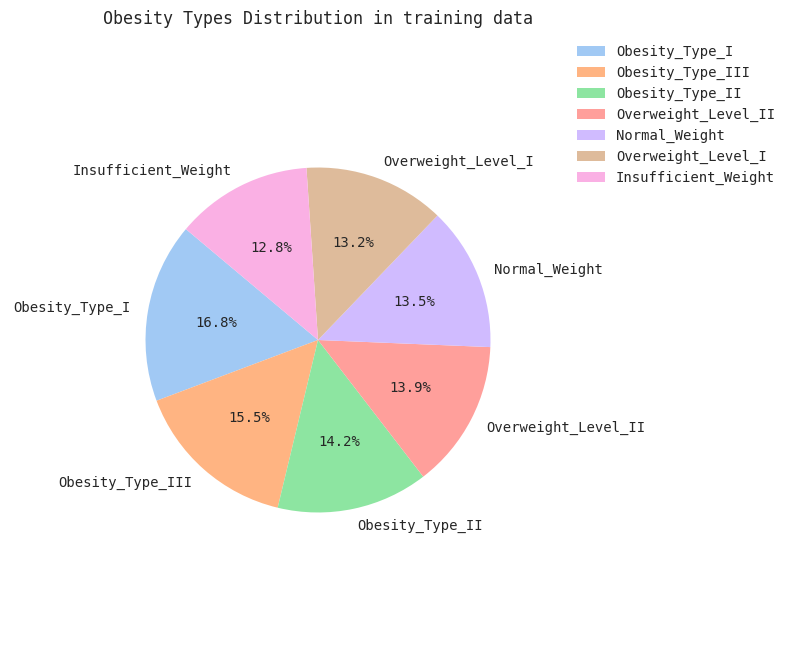

In [90]:
nobeyesdadVC_y_train = y_train.value_counts()
labels = nobeyesdadVC_y_train.index.tolist()
sizes = nobeyesdadVC_y_train.values.tolist()
colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors= colors, autopct='%1.1f%%', startangle=140, radius=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Obesity Types Distribution in training data')

plt.show()

In [91]:
y_test.value_counts()

Obesity_Type_I         70
Obesity_Type_III       65
Obesity_Type_II        60
Overweight_Level_II    58
Normal_Weight          57
Overweight_Level_I     55
Insufficient_Weight    53
Name: NObeyesdad, dtype: int64

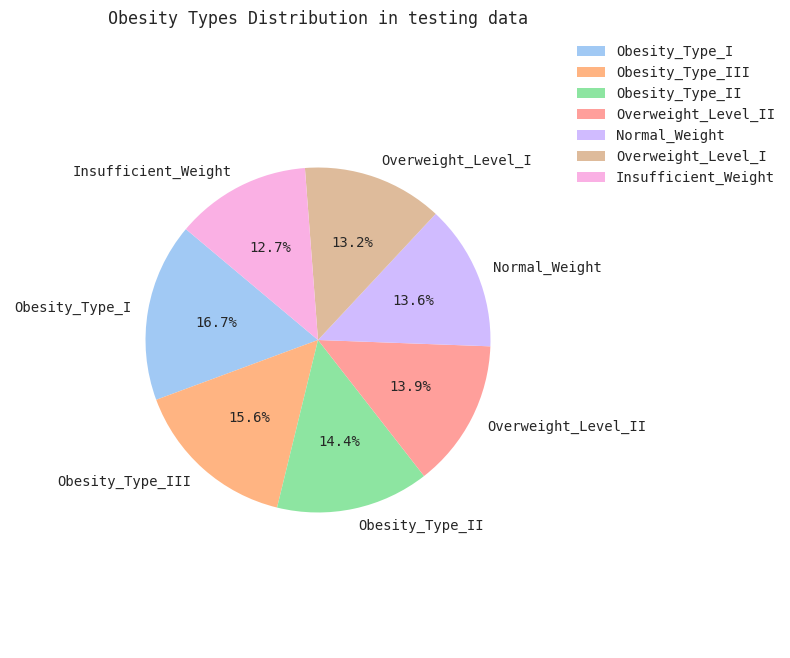

In [92]:
nobeyesdadVC_y_test = y_test.value_counts()
labels = nobeyesdadVC_y_test.index.tolist()
sizes = nobeyesdadVC_y_test.values.tolist()
colors = sns.color_palette('pastel')[0:10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors= colors, autopct='%1.1f%%', startangle=140, radius=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))
plt.title('Obesity Types Distribution in testing data')

plt.show()

As we can see, the proportion of each label in training and test label after using `train_test_split` with stratifed sampling is pretty balance.

In [93]:
metrics = {'accuracy': accuracy_scorer, 'f1': f1_scorer}

<a name="training-evaluation"></a>
## 5. Model training and evaluation
- Evaluation technique: *Stratified sampling*
- Baseline model only 

### Logistic Regression

In [94]:
lr = LogisticRegression(max_iter=10000, random_state=RANDOM_STATE)

lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
lr_train_acc = accuracy_score(y_train, y_pred_train_lr)

y_pred_test_lr = lr.predict(X_test)
lr_test_acc = accuracy_score(y_test, y_pred_test_lr)

print("Training Accuracy:", lr_train_acc)
print("Test Accuracy:", lr_test_acc)
print(classification_report(y_test, y_pred_test_lr))

Training Accuracy: 0.8987417615338527
Test Accuracy: 0.8899521531100478
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      1.00      0.97        53
      Normal_Weight       0.84      0.82      0.83        57
     Obesity_Type_I       0.90      0.91      0.91        70
    Obesity_Type_II       0.94      0.98      0.96        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.77      0.80      0.79        55
Overweight_Level_II       0.82      0.71      0.76        58

           accuracy                           0.89       418
          macro avg       0.89      0.89      0.89       418
       weighted avg       0.89      0.89      0.89       418



In [95]:
new_row = pd.DataFrame({"Model": ["Logistic Regression"],
                        "Parameter": ["max_iter = 10000"],
                        "Training accuracy": [0.8987],
                        "Test accuracy": [0.8899],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

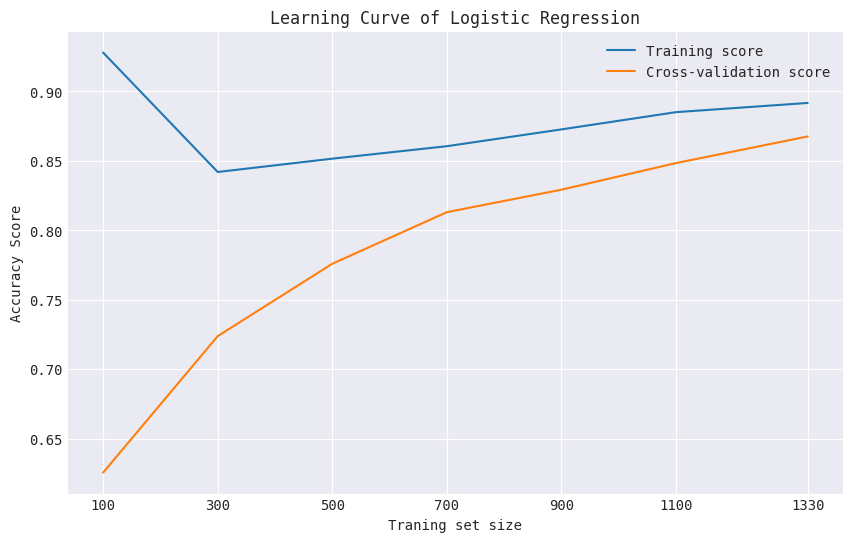

In [96]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(lr, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of Logistic Regression", y_label = "Accuracy Score")

#### Predict new instances

In [97]:
# temp = pd.DataFrame({
#     'Gender': ['Male'], 
#     'Age': [17],
#     'Height': [1.7],
#     'Weight': [70],
#     'family_history_with_overweight': ['no'],
#     'FAVC': ['yes'],
#     'FCVC': [2],
#     'NCP': [3],
#     'CAEC': ['Sometimes'],
#     'SMOKE': ['no'],
#     'CH2O': [3],
#     'SCC': ['yes'],
#     'FAF': [1],
#     'TUE': [1],
#     'CALC': ['no'],
#     'MTRANS': ['Public_Transportation']
# })
# temp_clean = simple_data_preprocessing_testing(temp)
# temp_clean

In [98]:
# temp = pd.DataFrame({
#     'Gender': ['Male'],
#     'Age': [21],
#     'Height': [1.72],
#     'Weight': [70],
#     'family_history_with_overweight': ['no'],
#     'FAVC': ['yes'],
#     'FCVC': [2],
#     'NCP': [2],
#     'CAEC': ['Always'],
#     'SMOKE': ['no'],
#     'CH2O': [2],
#     'SCC': ['no'],
#     'FAF': [3],
#     'TUE': [12],
#     'CALC': ['Sometimes'],
#     'MTRANS': ['Motorbike']
# })
# temp_clean = simple_data_preprocessing_testing(temp)
# temp_clean

In [99]:
# lr.predict(temp_clean)

In [100]:
# temp = pd.DataFrame({
#     'Gender': ['Female'],
#     'Age': [26],
#     'Height': [1.62495],
#     'Weight': [111.946321],
#     'family_history_with_overweight': ['yes'],
#     'FAVC': ['yes'],
#     'FCVC': [3],
#     'NCP': [3],
#     'CAEC': ['Sometimes'],
#     'SMOKE': ['no'],
#     'CH2O': [2.770125],
#     'SCC': ['no'],
#     'FAF': [0],
#     'TUE': [0.09776],
#     'CALC': ['Sometimes'],
#     'MTRANS': ['Public_Transportation']
# })
# temp_clean = simple_data_preprocessing_testing(temp)
# temp_clean

In [101]:
# lr.predict(temp_clean)

### Decision tree

In [102]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt.fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
dt_train_acc = accuracy_score(y_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(X_test)
dt_test_acc = accuracy_score(y_test, y_pred_test_dt)

print("Training Accuracy:", dt_train_acc)
print("Test Accuracy:", dt_test_acc)
print(classification_report(y_test, y_pred_test_dt))

Training Accuracy: 1.0
Test Accuracy: 0.9282296650717703
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        53
      Normal_Weight       0.83      0.91      0.87        57
     Obesity_Type_I       0.93      0.91      0.92        70
    Obesity_Type_II       0.97      0.97      0.97        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.90      0.78      0.83        55
Overweight_Level_II       0.90      0.97      0.93        58

           accuracy                           0.93       418
          macro avg       0.93      0.93      0.93       418
       weighted avg       0.93      0.93      0.93       418



In [103]:
new_row = pd.DataFrame({"Model": ["Decision Tree"],
                        "Parameter": ["None"],
                        "Training accuracy": [1.00],
                        "Test accuracy": [0.93],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

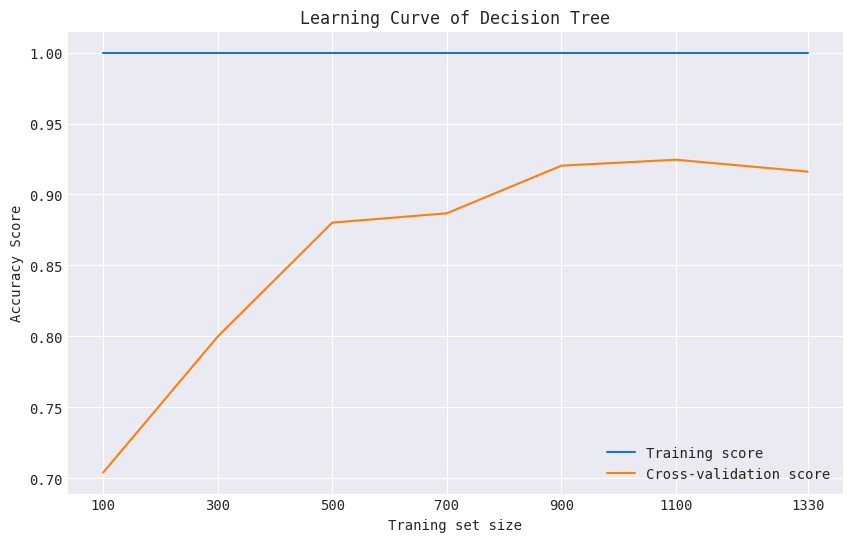

In [104]:
train_sizes, train_scores, valid_scores = learning_curve(dt, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of Decision Tree", y_label = "Accuracy Score")

Decision Tree tends to be overfitting if we increase the training size.

### Random forest

In [105]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_test_rf)

print("Training Accuracy:", rf_train_acc)
print("Test Accuracy:", rf_test_acc)
print(classification_report(y_test, y_pred_test_rf))

Training Accuracy: 1.0
Test Accuracy: 0.9593301435406698
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.82      0.96      0.89        57
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.89      0.92        55
Overweight_Level_II       0.95      0.95      0.95        58

           accuracy                           0.96       418
          macro avg       0.96      0.96      0.96       418
       weighted avg       0.96      0.96      0.96       418



In [106]:
new_row = pd.DataFrame({"Model": ["Random Forest"],
                        "Parameter": ["None"],
                        "Training accuracy": [1.00],
                        "Test accuracy": [0.96],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

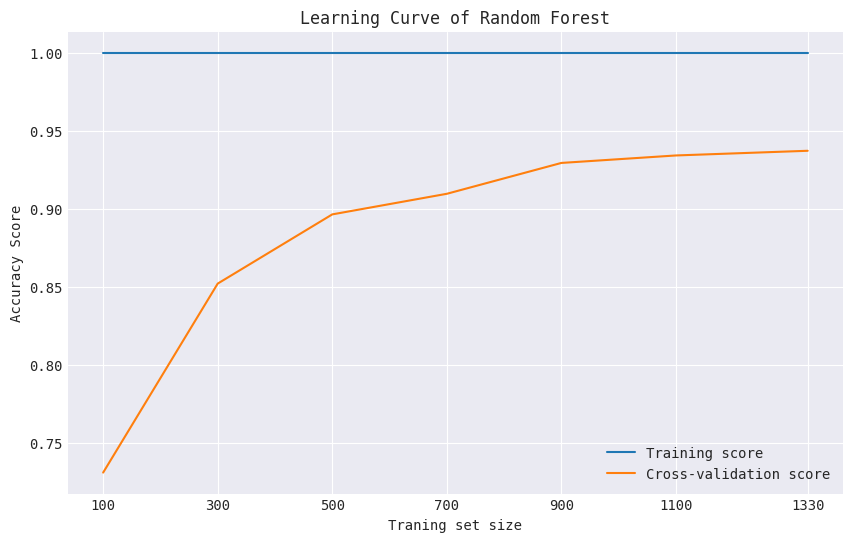

In [107]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(rf, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of Random Forest", y_label = "Accuracy Score")

### SVM

In [108]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_train_svc = svc.predict(X_train)
svc_train_acc = accuracy_score(y_train, y_pred_train_svc)

y_pred_test_svc = svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, y_pred_test_svc)

print("Training Accuracy:", svc_train_acc)
print("Test Accuracy:", svc_test_acc)
print(classification_report(y_test, y_pred_test_svc))

Training Accuracy: 0.92690233672858
Test Accuracy: 0.861244019138756
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.92      0.94        53
      Normal_Weight       0.62      0.75      0.68        57
     Obesity_Type_I       0.91      0.91      0.91        70
    Obesity_Type_II       0.97      0.95      0.96        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.78      0.76      0.77        55
Overweight_Level_II       0.80      0.71      0.75        58

           accuracy                           0.86       418
          macro avg       0.86      0.86      0.86       418
       weighted avg       0.87      0.86      0.86       418



In [109]:
new_row = pd.DataFrame({"Model": ["SVM"],
                        "Parameter": ["None"],
                        "Training accuracy": [0.93],
                        "Test accuracy": [0.86],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

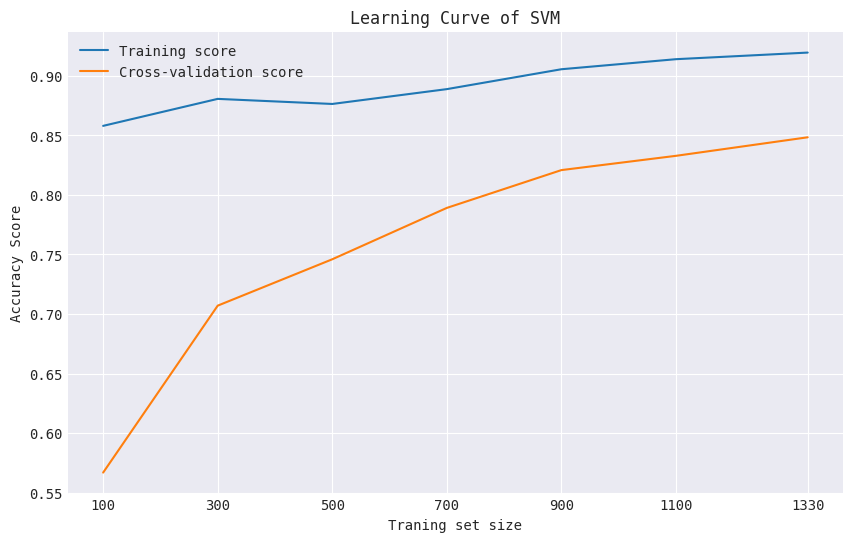

In [110]:
train_sizes, train_scores, valid_scores = learning_curve(svc, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of SVM", y_label = "Accuracy Score")

### XGBoost

First of all, we need to map our target labels into numeric values.

In [111]:
mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
y_train_encode = y_train.map(mapping)
y_test_encode = y_test.map(mapping)

In [112]:
xgbModel = XGBClassifier(random_state=RANDOM_STATE)

xgbModel.fit(X_train, y_train_encode)
y_pred_train_xgb = xgbModel.predict(X_train)
xgb_train_acc = accuracy_score(y_train_encode, y_pred_train_xgb)

y_pred_test_xgb = xgbModel.predict(X_test)
xgb_test_acc = accuracy_score(y_test_encode, y_pred_test_xgb)

print("Training Accuracy:", xgb_train_acc)
print("Test Accuracy:", xgb_test_acc)
print(classification_report(y_test_encode, y_pred_test_xgb))

Training Accuracy: 1.0
Test Accuracy: 0.9665071770334929
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.93      0.94        57
           2       0.89      0.93      0.91        55
           3       0.95      0.98      0.97        58
           4       1.00      0.94      0.97        70
           5       0.97      1.00      0.98        60
           6       1.00      0.98      0.99        65

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [113]:
new_row = pd.DataFrame({"Model": ["XGBoost"],
                        "Parameter": ["None"],
                        "Training accuracy": [1.00],
                        "Test accuracy": [0.97],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

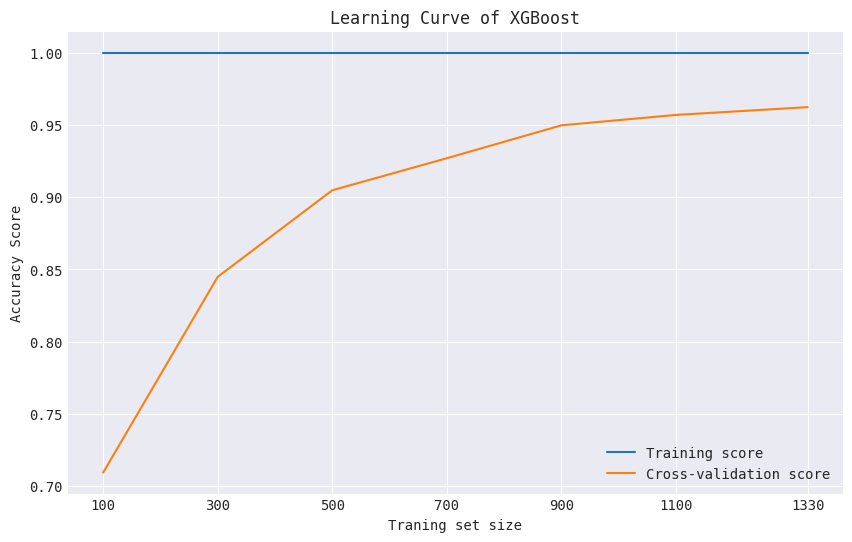

In [114]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(xgbModel, X_train, y_train_encode, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of XGBoost", y_label = "Accuracy Score")

### K-Nearest Neighbors

In [115]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_train_knn = knn.predict(X_train)
knn_train_acc = accuracy_score(y_train, y_pred_train_knn)

y_pred_test_knn = knn.predict(X_test)
knn_test_acc = accuracy_score(y_test, y_pred_test_knn)

print("Training Accuracy:", knn_train_acc)
print("Test Accuracy:", knn_test_acc)
print(classification_report(y_test, y_pred_test_knn))

Training Accuracy: 0.8639904134212103
Test Accuracy: 0.8086124401913876
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.94      0.84        53
      Normal_Weight       0.57      0.49      0.53        57
     Obesity_Type_I       0.86      0.90      0.88        70
    Obesity_Type_II       0.89      0.95      0.92        60
   Obesity_Type_III       0.97      0.98      0.98        65
 Overweight_Level_I       0.68      0.62      0.65        55
Overweight_Level_II       0.84      0.72      0.78        58

           accuracy                           0.81       418
          macro avg       0.80      0.80      0.80       418
       weighted avg       0.80      0.81      0.80       418



In [116]:
new_row = pd.DataFrame({"Model": ["K-Nearest Neighbors"],
                        "Parameter": ["None"],
                        "Training accuracy": [0.86],
                        "Test accuracy": [0.81],
                        "Evaluation techniques": ["Stratified sampling"]})

df_results = pd.concat([df_results, new_row], ignore_index=True)

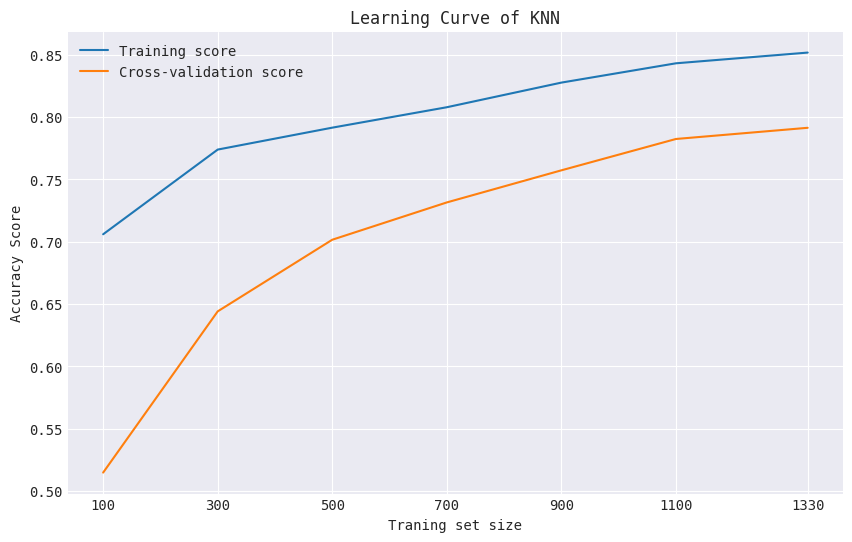

In [117]:
train_sizes, train_scores, valid_scores = learning_curve(knn, X_train, y_train, train_sizes=[100, 300, 500, 700, 900, 1100, 1330], scoring = accuracy_scorer)
plot_learning_curve(train_sizes, train_scores, valid_scores, title = "Learning Curve of KNN", y_label = "Accuracy Score")

In [119]:
df_results.style.format({'Training accuracy' : "{:.7}", 'Test accuracy' : "{:.4}"}).set_properties(**{
    'text-align': 'center',
    'white-space': 'pre-wrap',}).set_table_styles([dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center")])])

,Model,Parameter,Training accuracy,Test accuracy,Evaluation techniques
0,Logistic Regression,max_iter = 10000,0.8987,0.8899,Stratified sampling
1,Decision Tree,None,1.0,0.93,Stratified sampling
2,Random Forest,None,1.0,0.96,Stratified sampling
3,SVM,None,0.93,0.86,Stratified sampling
4,XGBoost,None,1.0,0.97,Stratified sampling
5,K-Nearest Neighbors,None,0.86,0.81,Stratified sampling


In general, 4 out of 6 listing models have better performance with this technique, compared to the simple data preprocessing method. 